# Data Storytelling with Educational Data

## Student Performance in Exams

#### Purpose/Question:

For this exercise I will be using the data from: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams to analyze: 
>__How do various factors influence student performance?__

Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Exploring the data:

In [2]:
df = pd.read_csv('C:/Users/niniw/Documents/Data Storytelling Exercise/exams.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,free/reduced,completed,77,83,70
1,male,group C,associate's degree,free/reduced,completed,66,75,76
2,male,group C,bachelor's degree,standard,none,75,65,70
3,female,group C,some college,standard,completed,80,87,88
4,male,group C,some high school,free/reduced,completed,53,52,53


__Factors:__
<br>1) Gender
<br>2) Race/Ethnicity
<br>3) Parental level of education
<br>5) Lunch Program
<br>6) Test Preparation Course

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.963000,69.315000,67.993000
std,15.476342,14.569971,15.311937
min,13.000000,19.000000,8.000000
25%,57.000000,59.000000,57.750000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


To help determine and simplify the students grades, I will be creating a variable, "pass_grade" based of the United Kingdom grading system in which a failing grade is a grade below 40:

<br>__Grading:__
<br>A (First-Class honours) = 70 - 100
<br>B (Second-Class honours; upper division) = 60 -69
<br>C (Second-Class honours; lower division)= 50 - 59
<br>D (Third-class honours) = 40 - 49
<br>F = Below 40 (Fail)

In [5]:
#Defning a passing grade:
pass_grade = 40

### Exploring the scores:

#### Math Scores

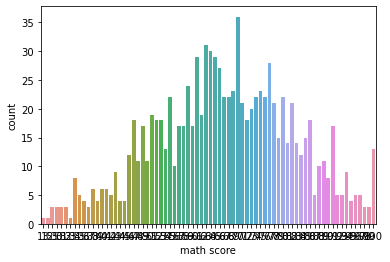

In [6]:
math_plot = sns.countplot( x = "math score", data = df)

In [7]:
#Counting how many students pass the math exam:
df['Math_PassStatus'] = np.where(df['math score']<pass_grade, 'F', 'P')
df.Math_PassStatus.value_counts()

P    955
F     45
Name: Math_PassStatus, dtype: int64

#### Reading Scores

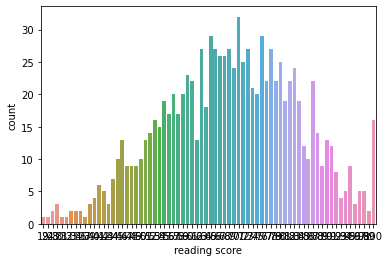

In [8]:
reading_plot = sns.countplot( x = "reading score", data = df)

In [9]:
#Counting how many students pass the reading exam:
df['Reading_PassStatus'] = np.where(df['reading score']<pass_grade, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    981
F     19
Name: Reading_PassStatus, dtype: int64

#### Writing Scores

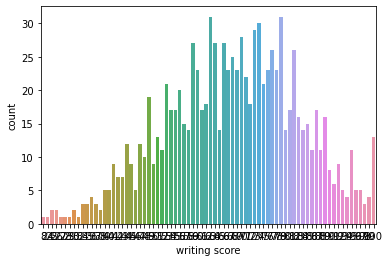

In [10]:
writing_plot = sns.countplot(x="writing score", data = df)

In [11]:
#Counting how many students pass the writing exam:
df['Writing_PassStatus'] = np.where(df['writing score']<pass_grade, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

### Reviewing Overall Scores:

In [12]:
#How many students passed overall
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    944
F     56
Name: OverAll_PassStatus, dtype: int64

In [13]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

In [14]:
#Creating a function to categorize each grade
def SortGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : SortGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    256
C    242
A    216
D    173
E     57
F     56
Name: Grade, dtype: int64

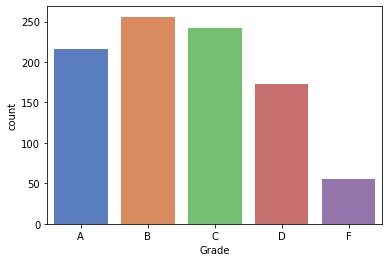

In [15]:
#Review Overall Scores:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','F'],  palette="muted")
plt.show()

### Taking a Closer Look at Each Score and Relation with Factors:

#### Comparing Gender and Test Prep

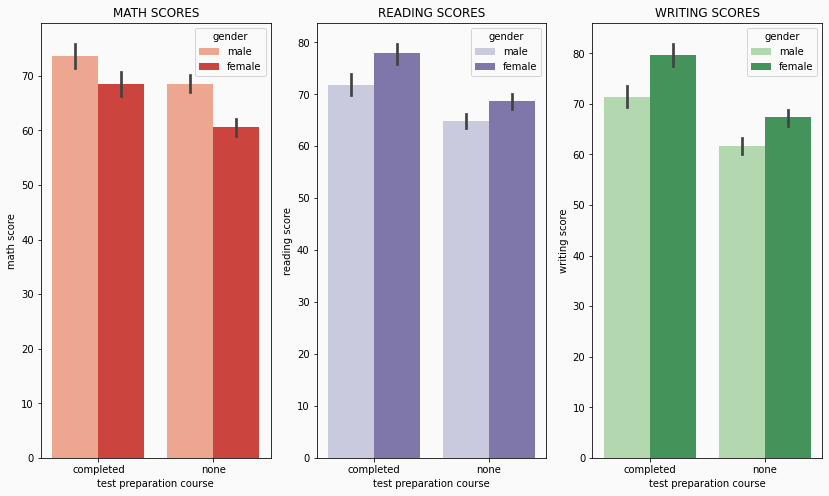

In [16]:
plt.rcParams['figure.facecolor'] = "#fafafa"
plt.rcParams['axes.facecolor'] = "#fafafa"

plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',palette='Reds')
plt.title('MATH SCORES')

plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',palette='Purples')
plt.title('READING SCORES')

plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',palette='Greens')
plt.title('WRITING SCORES')
plt.show()

From these scores we can see that students who tend to complete a test preparation course perform better than those who do not complete a test preparation course. It also seems that in general, males tend to perform better in the math exams whereas females tend to perform better in the reading and writing exam.

#### Taking a look at possible correlations:

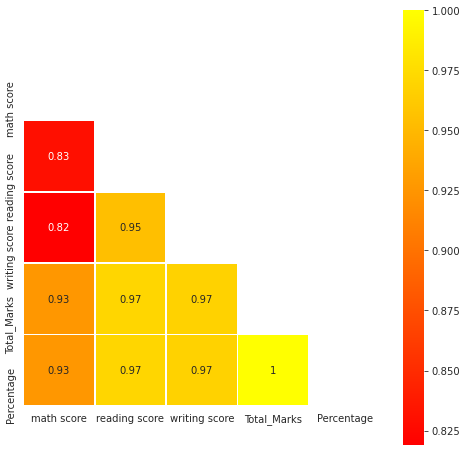

In [21]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="autumn",annot=True)

From this graph, we can determine how exam scores correlate with one another. Clearly we can see how there is a strong correlation of 0.95 between reading and writing scores and a weaker correlation of 0.82/0.83 between math scores and writing scores and math scores and reading scores. We can assume that if a student performs well in the writing exam, then they should also perform well in the reading exam and vice versa.

#### Comparing Test Prep and Lunch Status

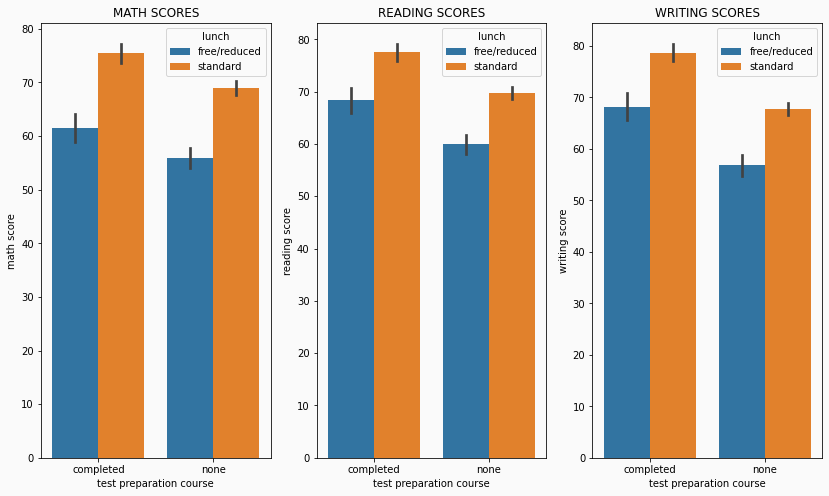

In [18]:
plt.rcParams['figure.facecolor'] = "#fafafa"
plt.rcParams['axes.facecolor'] = "#fafafa"

plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='lunch')
plt.title('MATH SCORES')

plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='lunch')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)

sns.barplot(x='test preparation course',y='writing score',data=df,hue='lunch')
plt.title('WRITING SCORES')
plt.show()

From these graphs it appears as though students who had standard lunch opposed to free lunch performed better overall despite having completed the test preparation course or not. This could lead into further examination into the students financial/economic situation and how that affects exam performance.

#### Comparing Gender and Race/Ethnicity

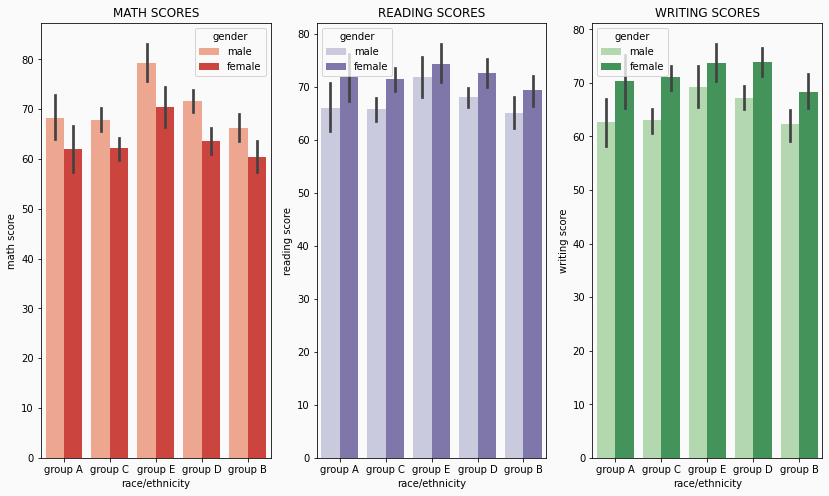

In [19]:
plt.rcParams['figure.facecolor'] = "#fafafa"
plt.rcParams['axes.facecolor'] = "#fafafa"

plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender',palette='Reds')

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender',palette='Purples')

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender',palette='Greens')
plt.show()

Looking at the math scores, we can see that males perform better across the different races/ethnicities. We also see that for the writing and reading scores that females perform better across the different races/ethnicities. It also appears as theou group E has the highest scores of all three exams with group C and group B on the lower end of the scores.

#### Comparing Gender and Parental Level of Education

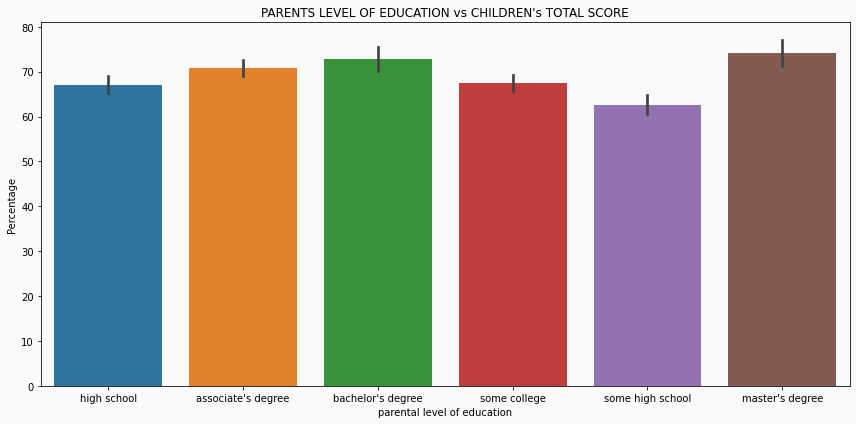

In [20]:
plt.rcParams['figure.facecolor'] = "#fafafa"
plt.rcParams['axes.facecolor'] = "#fafafa"

plt.figure(figsize=(12,6))
plt.title('PARENTS LEVEL OF EDUCATION vs CHILDREN\'s TOTAL SCORE')
sns.barplot(x=df['parental level of education'],y='Percentage',data=df)
plt.tight_layout()

In general, from this graph we can see that parents who tend to hold some college degree or higher perform better than those whose parents only have some high school degree. We can also see how parents with a Master's degree perform better than parents who hold a bachelors, and that those with a bachelors perform better than those with an associate's degree or some college degree. It appears as though the higher education of the parents, the better the students perform on exams. 

# What Did We Learn From This Data?

From the various graphs that were created to visualize how factors might influence student exam peerfomrance, we were able to see a few patterns:

-  Students who tend to complete a test preparation course perform better than those who do not complete a test preparation course. It also seems that in general, males tend to perform better in the math exams whereas females tend to perform better in the reading and writing exam.

- We can assume that if a student performs well in the writing exam, then they should also perform well in the reading exam and vice versa.

- Students who had standard lunch opposed to free lunch performed better overall despite having completed the test preparation course or not. 

- Looking at the math scores, we can see that males perform better across the different races/ethnicities. We also see that for the writing and reading scores that females perform better across the different races/ethnicities. It also appears as theou group E has the highest scores of all three exams with group C and group B on the lower end of the scores.

- It appears as though the higher the  level of education of the parents, the better the students perform on exams. 
